In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def findCorner(img,window_size,thresh):
    im_gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)
 
    Iy,Ix=np.gradient(im_gray)
    ksize=7

    Ixx=cv.GaussianBlur(Ix*Ix,(ksize,ksize),cv.BORDER_DEFAULT)
    Iyy=cv.GaussianBlur(Iy*Iy,(ksize,ksize),cv.BORDER_DEFAULT)
    Ixy=cv.GaussianBlur(Ix*Iy,(ksize,ksize),cv.BORDER_DEFAULT)

    height=im_gray.shape[0]
    width=im_gray.shape[1]
    offset=int(window_size/2)
    
    newImg=im_gray.copy()
    color_img=cv.cvtColor(newImg,cv.COLOR_GRAY2RGB)

    for y in range(offset,height-offset):
        for x in range(offset,width-offset):
            windowIxx=Ixx[y-offset:y+offset+1,x-offset:x+offset+1]
            windowIxy=Ixy[y-offset:y+offset+1,x-offset:x+offset+1]
            windowIyy=Iyy[y-offset:y+offset+1,x-offset:x+offset+1]

            Sxx=windowIxx.sum()
            Syy=windowIyy.sum()
            Sxy=windowIxy.sum()

            #find det
            det=(Sxx*Syy)-(Sxy**2)
            trace=Sxx+Syy
            k=0.04 #k=0.04-0.06
            r=det-k*(trace**2)
            if r > thresh:
                color_img.itemset((y,x,0),255)
                color_img.itemset((y,x,1),0)
                color_img.itemset((y,x,2),0)
    return color_img

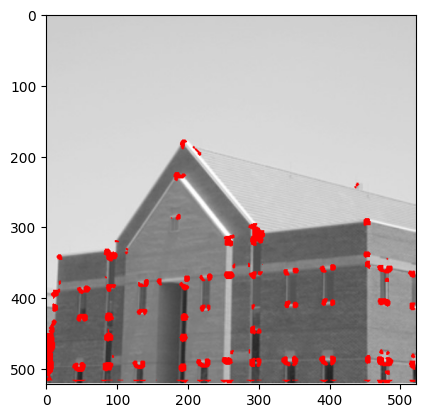

In [3]:
img=cv.imread("building.jpg")
dis=findCorner(img,2,80000)
plt.imshow(dis)

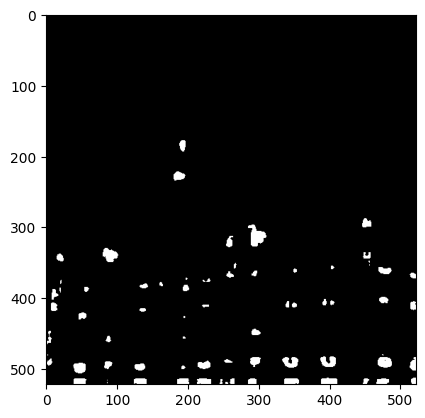

In [4]:
img=cv.imread("building.jpg")
im_gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

dst=cv.cornerHarris(im_gray,9,21,0.04)

dst_norm = np.empty(dst.shape, dtype=np.float32)

cv.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv.NORM_MINMAX)

corner=np.where(dst_norm>60)

display=np.zeros(dst.shape)

display[corner]=255

plt.imshow(display,cmap='gray')

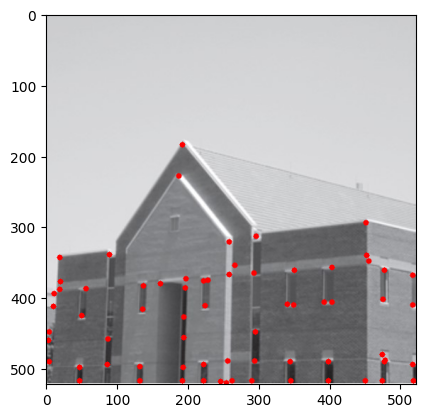

In [5]:
contours, _h=cv.findContours(np.uint8(display), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

for i in range(0,len(contours)):
    M = cv.moments(contours[i])
    if(M["m00"]>0):
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        img = cv.circle(img, (cX,cY), 4, (0,0,255), -1)

rgb_img=cv.cvtColor(img,cv.COLOR_BGR2RGB)
# cv.imwrite("building_corner.jpg",img)
plt.imshow(rgb_img)

In [6]:
def shi_tomasi(image):
    #Converting to grayscale
    gray_img = cv.cvtColor(image,cv.COLOR_BGR2GRAY)
    
    #Specifying maximum number of corners as 1000
    # 0.01 is the minimum quality level below which the corners are rejected
    # 10 is the minimum euclidean distance between two corners
    corners_img = cv.goodFeaturesToTrack(gray_img,1000,0.01,10)
    corners_img = np.int0(corners_img)
    out_img=image.copy()
    for corners in corners_img:
       
        x,y = corners.ravel()
        #Circling the corners in green
        cv.circle(out_img,(x,y),3,(0,255,0),-1)

    return out_img

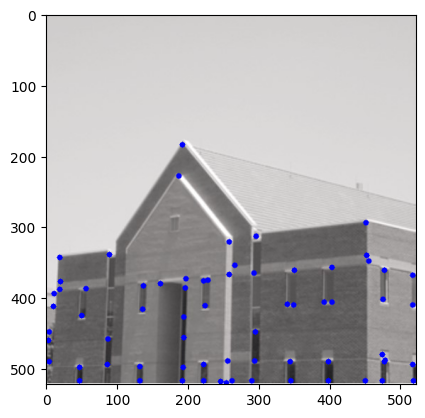

In [7]:
plt.imshow(img)

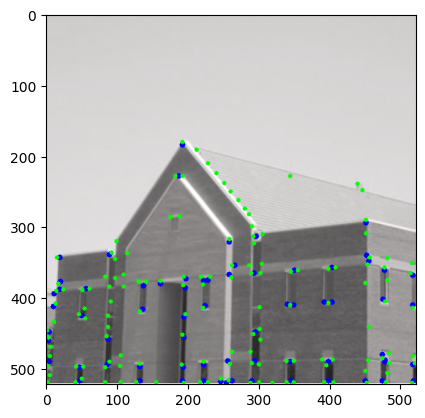

In [8]:
shi_out=shi_tomasi(img)
plt.imshow(shi_out)